## **Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

## **Perceptron (from Scratch)**

In [24]:
class perceptron():
    
    def __init__(self , in_features , eta=0.1 , n_iter=1000 , random_state=42):
        np.random.seed(random_state)
        self.in_feature = in_features
        self.eta = eta
        self.n_iter = n_iter
        self.w = np.random.randn(in_features , 1)
        self.b = np.random.randn()
        self.loss_hist = []
        
    def fit(self , x , y):
        # Train Loop
        for i in range(self.n_iter):
            #Prediction
            y_hat = self.predict(x)
            #Loss
            loss = self._loss(y , y_hat)
            #grad
            grad_w , grad_b = self._grads(x , y , y_hat)
            #Update Params
            self.w -= self.eta * grad_w
            self.b -= self.eta * grad_b
            self.loss_hist.append(loss)
        
    def predict(self , x):
        return x @ self.w + self.b
    
    
    def _loss(self , y , y_hat):
        return np.maximum(0 , -y*y_hat).mean()
    
    def _grads(self , x , y , y_hat):
        grad_w = (-y*x * np.heaviside(-y*y_hat, 1)).mean(axis=0).reshape(self.w.shape)
        grad_b = (-y * np.heaviside(-y*y_hat, 1)).mean(axis=0)
        return grad_w , grad_b
    
    def score(self , x , y):
        y_hat = self.predict(X)
        return self._accuracy(y, y_hat, t=0)
    
    def _accuracy(self, y, y_hat, t=0):
        y_hat = np.where(y_hat<t, -1, 1)
        acc = np.sum(y == y_hat) / len(y)
        return acc

## **Data**

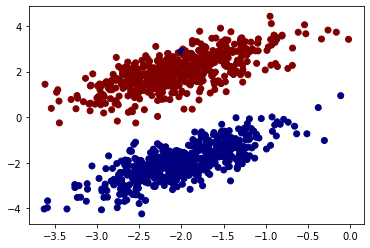

In [25]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=2., random_state=12)
y = np.where(y==0, -1, y)
y = y[: , None]

plt.scatter(x=X[:, 0], y=X[:, 1], c=y , cmap='jet');

## **Train**

In [26]:
model = perceptron(in_features=2)
model.fit(X , y)

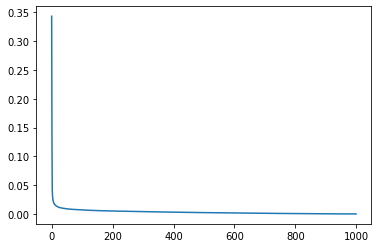

In [28]:
plt.plot(model.loss_hist);

## **Evaluation**

In [29]:
model.score(X , y)

0.997

## **Decision Boundary**

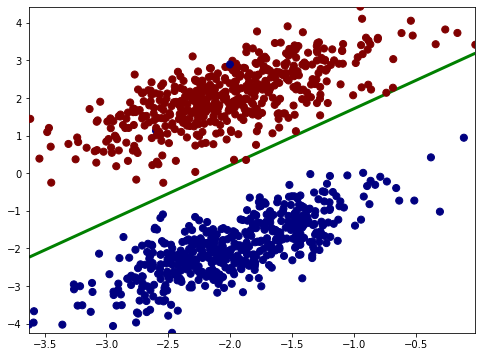

In [30]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.predict(Xm)
ym = ym.reshape(x1m.shape)

plt.figure(figsize=(8,6))
plt.contour(x1m, x2m, ym, levels=[0], linewidths=3, colors='green');

plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='jet', s=50, zorder=3);